# Titanic Challenge using Decision Trees

Some assumptions to start with
- "Women and children first" -> sex and age probably have a lot to do with who survived
- Social standing (ie. class) might also

## Prerequisites

In [98]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# do not show warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [123]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

combined = [train, test]

## Exploring

In [22]:
# check which features we have available
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
#type(train)

pandas.core.frame.DataFrame

In [21]:
# check dimensions
train.shape

(891, 12)

In [14]:
# check data types of different columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
# see first few values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# take random sample of data
train.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S


In [24]:
# summary of numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
# summary of categorical data
train.describe(include=["O"])

,Sex
count,891
unique,2
top,male
freq,577


In [93]:
# check how many missing values different columns have
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# check how big % survived based on sex
# select two columns, aggregate results, take mean and sort values just in case

train[["Sex", "Survived"]].groupby(by = "Sex", as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Wrangling

I'll leave more advanced feature engineering for later. Now, let' just:
- fill missing values for age
- drop unnecessary columns
- replace male and female values with 0 and 1

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
# fill missing values of age
train["Age"].fillna(train.Age.median(), inplace = True)

In [125]:
# drop unnecessary columns
# loop through both data frames and drop columns
for df in combined:
    df.drop("Name", axis = 1, inplace=True)
    df.drop("SibSp", axis = 1, inplace=True)
    df.drop("Parch", axis = 1, inplace=True)
    df.drop("Ticket", axis = 1, inplace=True)
    df.drop("Fare", axis = 1, inplace=True)
    df.drop("Cabin", axis = 1, inplace=True)
    df.drop("Embarked", axis = 1, inplace=True)

In [135]:
# convert male and female to 0 and 1
train["Sex"] = train["Sex"].map( {"female": 1, "male":0}).astype(int)

ValueError: Cannot convert NA to integer

In [134]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,0,22.0
1,2,1,1,1,38.0
2,3,1,3,1,26.0
3,4,1,1,1,35.0
4,5,0,3,0,35.0


## Visualization

To be updated...

In [70]:
import matplotlib.pyplot as plt

(array([  54.,   46.,  177.,  346.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

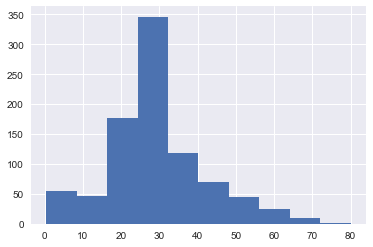

In [71]:
plt.hist(train.Age)

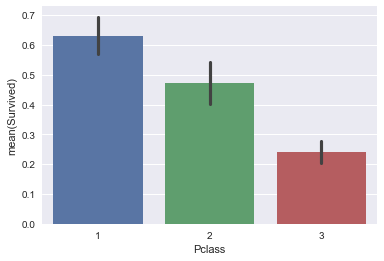

In [92]:
sns.barplot(x="Pclass", y = "Survived", data = train)

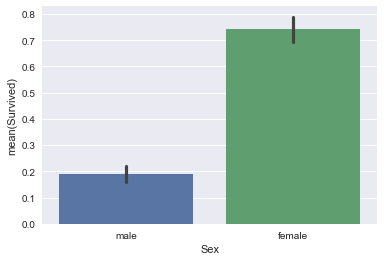

In [88]:
sns.barplot(y="Survived", x = "Sex", data = train)

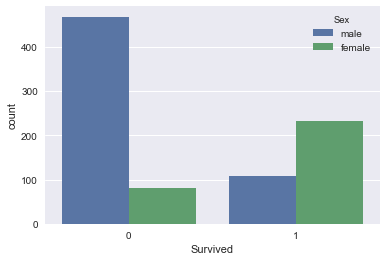

In [85]:
sns.countplot(x = "Survived", hue = "Sex", data = train)

## Training

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

In [136]:
tree = DecisionTreeClassifier()

x = train.drop(["Survived", "PassengerId"], axis = 1)
y = train["Survived"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .3)

In [137]:
tree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Performance

In [138]:
tree.score(x, y)

0.877665544332211